## Importing Library

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

## Import the data

In [3]:
df = pd.read_csv('Countries-exercise.csv')

In [4]:
df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       241 non-null    object 
 1   Longitude  241 non-null    float64
 2   Latitude   241 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


## EDA

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

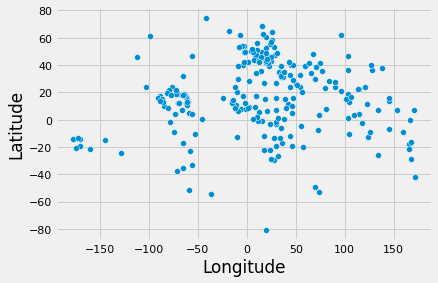

In [6]:
sns.scatterplot(df['Longitude'],df['Latitude'])

### Choosing the Latitude and longituder

In [7]:
x= df[['Latitude','Longitude']]

In [8]:
x

,Latitude,Longitude
0,12.520880,-69.982677
1,33.835231,66.004734
2,-12.293361,17.537368
3,18.223959,-63.064989
4,41.142450,20.049834
...,...,...
236,-13.753243,-172.164851
237,15.909280,47.586762
238,-29.000341,25.083901
239,-13.458242,27.774759


## Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)

## K means 

In [10]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters=10)

In [21]:
km.fit(x)

KMeans(n_clusters=10)

In [22]:
centroid= km.cluster_centers_
centroid

array([[ 0.65590203,  0.63064835],
       [-0.08237755, -1.19340881],
       [ 1.22348447, -0.08741364],
       [-0.10323455,  1.42845785],
       [-1.20479465,  0.25817096],
       [-0.21876099, -0.05328597],
       [-1.88781894, -1.00584378],
       [-1.27488058,  1.88807426],
       [-1.31649284, -2.45540446],
       [-2.94796161,  0.55670887]])

In [23]:
cluster = km.predict(x)
cluster

array([1, 0, 4, 1, 2, 2, 2, 0, 6, 0, 8, 9, 7, 9, 1, 7, 2, 0, 4, 2, 5, 5,
       3, 2, 0, 2, 1, 2, 1, 2, 1, 1, 6, 6, 1, 3, 0, 4, 5, 2, 6, 0, 5, 5,
       4, 5, 8, 1, 4, 5, 1, 1, 1, 1, 0, 0, 2, 2, 5, 1, 2, 1, 5, 1, 0, 5,
       2, 2, 5, 2, 7, 6, 2, 2, 3, 5, 2, 0, 2, 5, 5, 5, 5, 5, 2, 1, 2, 1,
       3, 1, 3, 9, 1, 2, 1, 2, 3, 2, 0, 7, 4, 2, 0, 0, 2, 0, 2, 1, 2, 0,
       3, 0, 0, 5, 0, 3, 1, 1, 3, 2, 0, 3, 0, 5, 5, 1, 2, 3, 4, 2, 2, 2,
       3, 1, 5, 2, 2, 4, 3, 1, 3, 2, 5, 2, 3, 2, 0, 3, 4, 5, 1, 4, 4, 3,
       4, 7, 5, 7, 5, 1, 8, 2, 2, 0, 7, 7, 0, 0, 1, 8, 1, 3, 3, 7, 2, 1,
       0, 2, 6, 0, 8, 0, 2, 0, 4, 5, 0, 5, 5, 5, 3, 6, 4, 7, 5, 1, 2, 5,
       5, 2, 2, 5, 1, 2, 2, 2, 4, 1, 4, 0, 1, 5, 5, 3, 0, 0, 7, 8, 1, 2,
       0, 3, 4, 5, 2, 6, 1, 0, 2, 1, 1, 1, 1, 3, 7, 8, 8, 5, 4, 4, 4])

In [24]:
df_new = df.copy()
df_new['cluster']= cluster
df_new

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,8
237,Yemen,47.586762,15.909280,5
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

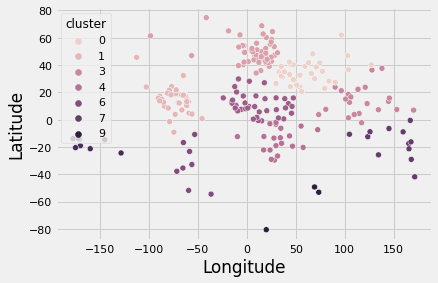

In [25]:
sns.scatterplot(df_new['Longitude'],df_new['Latitude'],hue=df_new['cluster'])

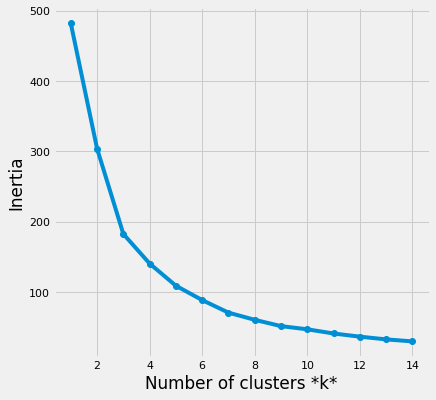

In [26]:
inertias = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');